In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

/home/baptista/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
fn = "data/3/data.TIF"

In [3]:
ds = gdal.Open(fn)

In [4]:
print("'ds' type", type(ds))

'ds' type <class 'osgeo.gdal.Dataset'>


In [5]:
print("Projection: ", ds.GetProjection())  # get projection
print("Columns:", ds.RasterXSize)  # number of columns
print("Rows:", ds.RasterYSize)  # number of rows
print("Band count:", ds.RasterCount)  # number of bands

Projection:  PROJCS["WGS 84 / UTM zone 33N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32633"]]
Columns: 17446
Rows: 14742
Band count: 4


In [6]:
print("GeoTransform", ds.GetGeoTransform())

GeoTransform (290614.718784, 0.14999999999999997, 0.0, 4641838.211464, 0.0, -0.14999999999999997)


In [7]:
data_array = []

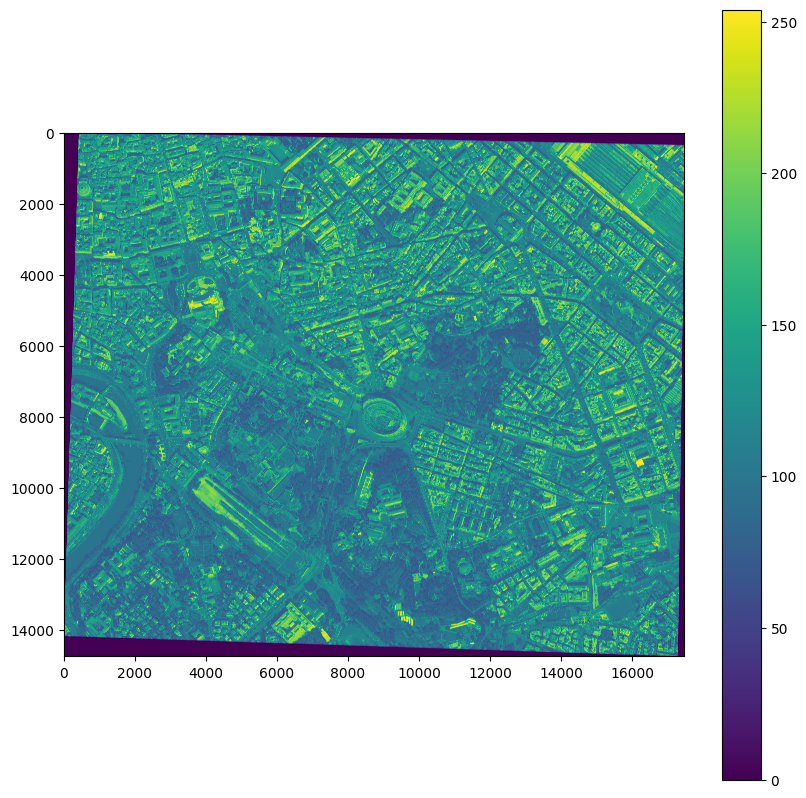

In [8]:
data_array.append(ds.GetRasterBand(1).ReadAsArray())
data_array[0].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[0])
plt.colorbar()

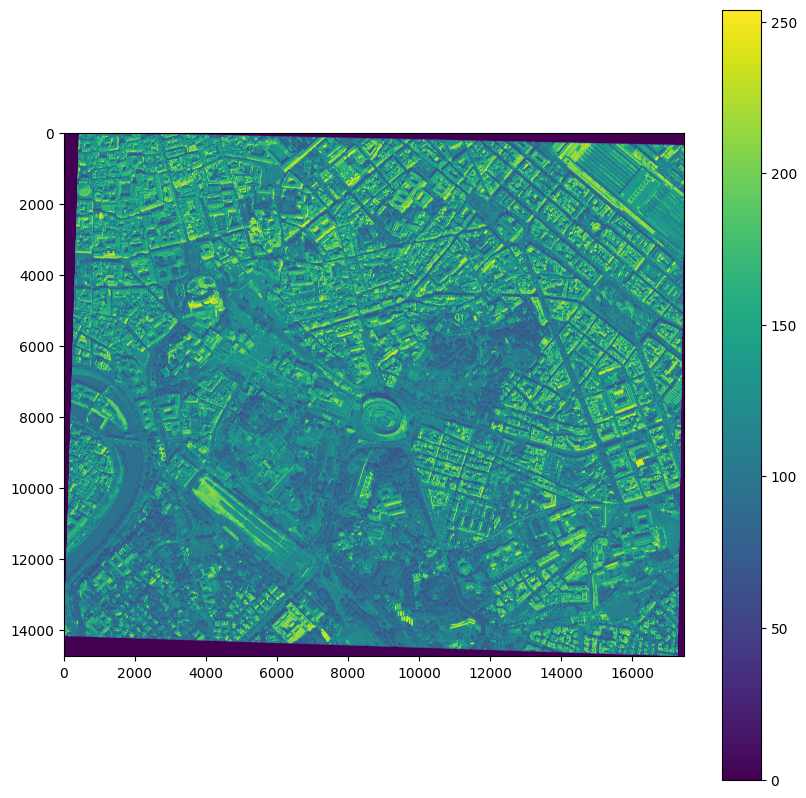

In [9]:
data_array.append(ds.GetRasterBand(2).ReadAsArray())
data_array[1].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[1])
plt.colorbar()

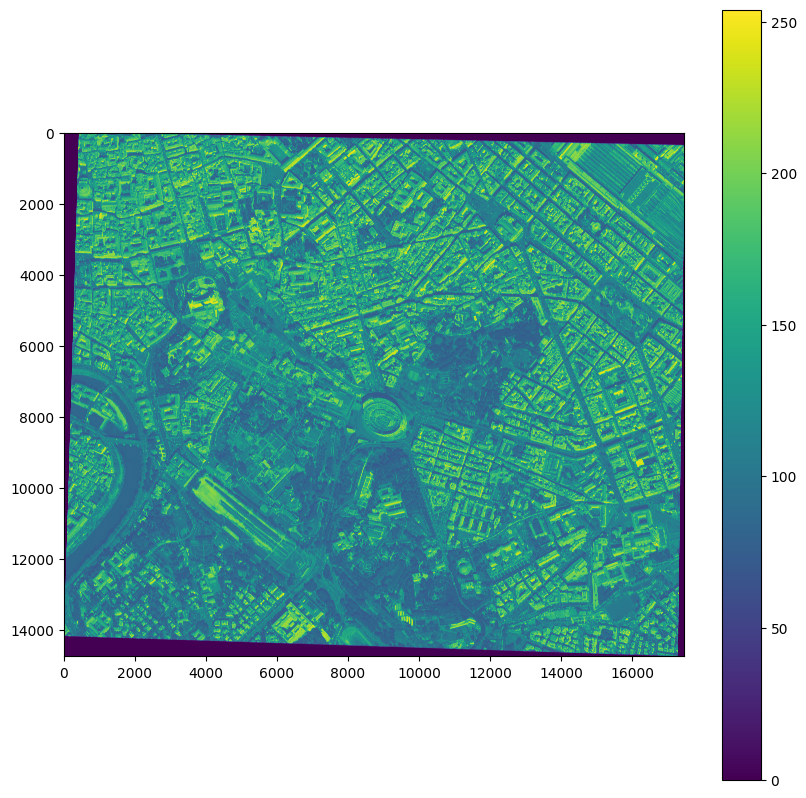

In [10]:
data_array.append(ds.GetRasterBand(3).ReadAsArray())
data_array[2].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[2])
plt.colorbar()

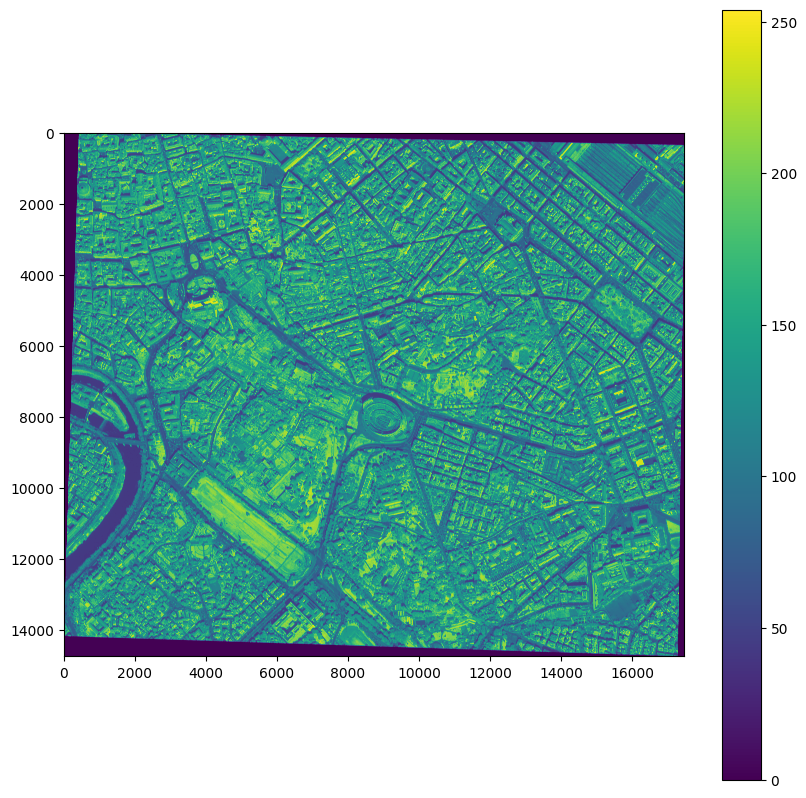

In [11]:
data_array.append(ds.GetRasterBand(4).ReadAsArray())
data_array[3].shape
plt.figure(figsize=(10, 10))
plt.imshow(data_array[3])
plt.colorbar()

In [12]:
# SUBSTRACT
one = np.array(data_array[1])
two = np.array(data_array[2])
# diff = np.subtract(one, two)
# print(diff)

print(np.array_equal(one,two))

# for i in range(100):
#     print(two[250,1200+i]-one[250,1200+i])

#print location and value of each pixel
for i in range(100):
    # Column index for the current iteration
    col_index = 1200 + i
    # Pixel values from each array at the specified location
    pixel_one = one[250, col_index]
    pixel_two = two[250, col_index]
    # Difference between the pixel values
    difference = pixel_two - pixel_one
    # Print the location, pixel values, and their difference
    print(f"Location (Row, Column): (250, {col_index}), Pixel Value from 'one': {pixel_one}, Pixel Value from 'two': {pixel_two}, Difference: {difference}")

False
35
31
32
31
30
29
30
27
24
21
17
14
14
19
16
13
10
10
10
12
9
4
6
8
6
8
8
4
6
13
12
21
20
17
17
18
18
18
21
17
19
25
28
26
25
23
22
21
17
21
18
17
17
18
16
12
13
16
16
13
11
20
15
13
14
15
16
7
11
12
11
6
252
249
246
247
255
0
245
248
249
252
251
255
4
10
7
8
9
7
2
4
5
8
11
14
14
8
0
2
Location (Row, Column): (250, 1200), Pixel Value from 'one': 97, Pixel Value from 'two': 132, Difference: 35
Location (Row, Column): (250, 1201), Pixel Value from 'one': 115, Pixel Value from 'two': 146, Difference: 31
Location (Row, Column): (250, 1202), Pixel Value from 'one': 112, Pixel Value from 'two': 144, Difference: 32
Location (Row, Column): (250, 1203), Pixel Value from 'one': 111, Pixel Value from 'two': 142, Difference: 31
Location (Row, Column): (250, 1204), Pixel Value from 'one': 111, Pixel Value from 'two': 141, Difference: 30
Location (Row, Column): (250, 1205), Pixel Value from 'one': 109, Pixel Value from 'two': 138, Difference: 29
Location (Row, Column): (250, 1206), Pixel Value

/tmp/ipykernel_27108/729696027.py:10: RuntimeWarning: overflow encountered in scalar subtract
  print(two[250,1200+i]-one[250,1200+i])
/tmp/ipykernel_27108/729696027.py:19: RuntimeWarning: overflow encountered in scalar subtract
  difference = pixel_two - pixel_one


In [13]:
# ndv = data_array = ds.GetRasterBand(1).GetNoDataValue()
# print('No data value:', ndv)

ndv = ds.GetRasterBand(1).GetNoDataValue()
print('No data value:', ndv)

No data value: None


In [14]:
ds = None

In [15]:
driver_gtiff = gdal.GetDriverByName('GTiff')
print(type(driver_gtiff))

<class 'osgeo.gdal.Driver'>


In [16]:
# reopen the dataset because we closed it above
ds = gdal.Open(fn)
fn_copy = "data/3/data_copy.TIF"
ds_copy = driver_gtiff.CreateCopy(fn_copy, ds)

In [17]:
data_array[0] = ds.GetRasterBand(1).ReadAsArray()  # read band data from the existing raster
data_nan = np.where(data_array[0] == ndv, np.nan, data_array[0])  # set all the no data values to np.nan so we can easily calculate the minimum elevation
data_min = np.min(data_nan)  # get the minimum elevation value (excluding nan)
data_stretch = np.where(data_array[0] == ndv, ndv, (data_array[0] - data_min) * 1.5)  # now apply the strech algorithm
ds_copy.GetRasterBand(1).WriteAsArray(data_stretch)  # write the calculated values to the raster
ds_copy = None  # properly close the raster

: 

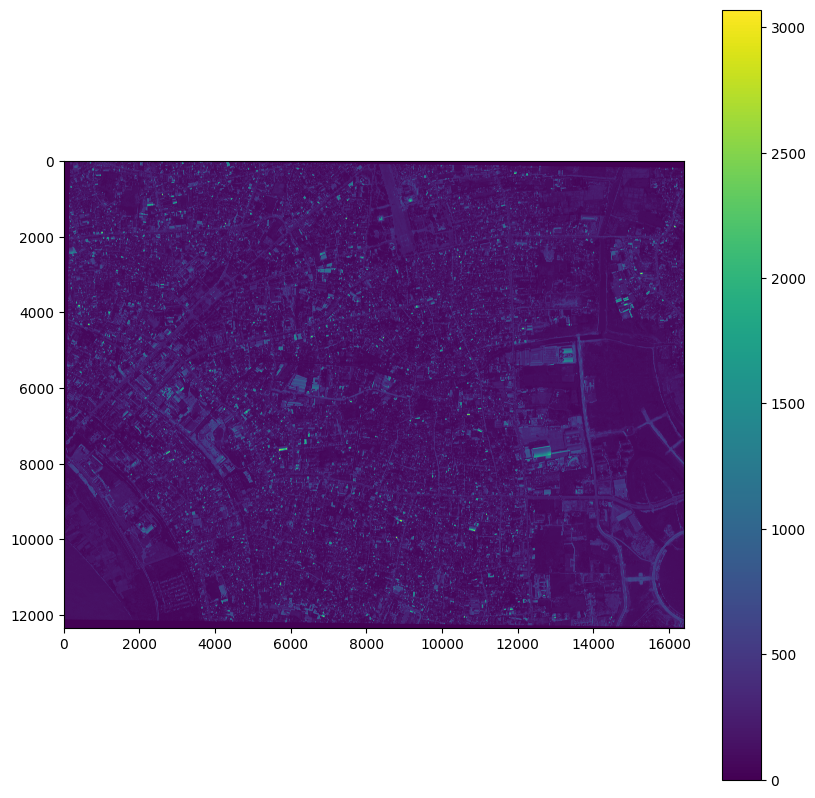

In [ ]:
ds_copy = gdal.Open(fn_copy)
data_stretch = ds_copy.GetRasterBand(1).ReadAsArray()
plt.figure(figsize=(10, 10))
plt.imshow(data_stretch)
plt.colorbar()